In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


H0: size 2 parties tip the same amount as any party in my data set

H1: size 2 parties tip a differnet amount from any party in my data set

This will be a 1 sample, two tailed t-test!

In [4]:
#define population mean
overall_tip = df.tip.mean()
overall_tip

2.99827868852459

In [7]:
#output is a distribution of values from sample 
tip_for_two = df[df['size'] == 2].tip

In [8]:
#sample distribution first the population mean
t_two, p_two = stats.ttest_1samp(tip_for_two, overall_tip)
t_two, p_two

(-5.271912239283316, 4.4632473980137726e-07)

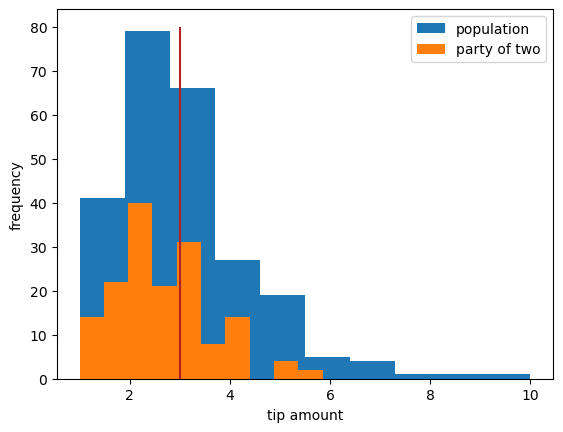

In [17]:
plt.hist(df.tip, label = 'population')
plt.hist(tip_for_two, label = 'party of two')
#line is population mean
plt.vlines(overall_tip, 0, 80, color = 'firebrick')
plt.xlabel('tip amount')
plt.ylabel('frequency')
plt.legend()

In [18]:
a = .05

if p_two < a:
    
    print('reject null hypothesis')
    
else:
    
    print('fail to reject null hypothesis')

reject null hypothesis


H0: guest for dinner pay less than or same amount as guests for lunch

H1: guest for dinner pay more than guests for lunch

this will be a 2 sample, 1 tailed t-test

In [29]:
lunch_bills = df[df.time == 'Lunch'].total_bill
lunch_bills

78     27.20
79     22.76
80     17.29
81     19.44
82     16.66
83     10.07
84     32.68
85     15.98
86     34.83
87     13.03
88     18.28
89     24.71
90     21.16
118    10.65
119    12.43
120    24.08
121    11.69
122    13.42
123    14.26
124    15.95
125    12.48
126    29.80
127     8.52
128    14.52
129    11.38
130    22.82
131    19.08
132    20.27
133    11.17
134    12.26
135    18.26
136     8.51
137    10.33
138    14.15
139    16.00
140    13.16
141    17.47
142    34.30
143    41.19
144    27.05
145    16.43
146     8.35
147    18.64
148    11.87
149     9.78
150     7.51
192    19.81
193    28.44
194    15.48
195    16.58
196     7.56
197    10.34
198    43.11
199    13.00
200    13.51
201    18.71
202    12.74
203    13.00
204    16.40
205    20.53
206    16.47
221    12.16
222    13.42
223     8.58
224    15.98
225    13.42
226    16.27
227    10.09
Name: total_bill, dtype: float64

In [23]:
dinner_bills = df[df.time == 'Dinner'].total_bill

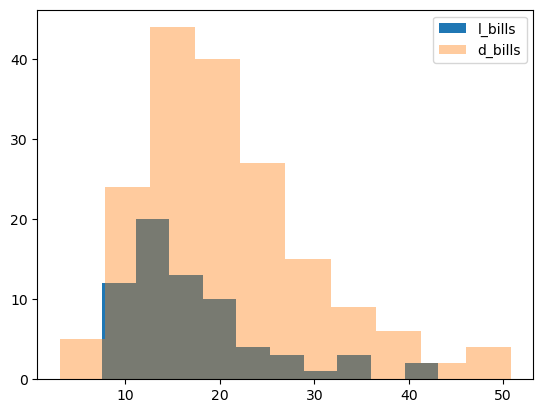

In [26]:
plt.hist(lunch_bills, label = 'l_bills')
plt.hist(dinner_bills, label = 'd_bills', alpha = .4)
plt.legend()

In [28]:
t_time, p_time = stats.ttest_ind(dinner_bills, lunch_bills)
t_time, p_time

(2.8976375218366424, 0.004104621407595674)

In [ ]:
a = .05

if (t_time > 0) and (p.time / 2 < a):
    
    print('reject H0')
    
elif 